In [1]:
import numpy as np
import pandas as pd
from string import ascii_lowercase 
from itertools import product
import random
from sklearn.metrics import hamming_loss
from sklearn.linear_model import Perceptron as perceptron
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from math import pow

In [2]:
def readFile(file_name):
    input_values = []
    temp_array = []
    f = open(file_name)
    for line in f:
        temp_array.append(line)
        if line == '\t\t\t\n':
            input_values.append(temp_array)
            temp_array = []
    return input_values

In [3]:
def splitInputOutputIndividualLine(file):
    x_values = []
    y_values = []
    split_values_array = []
    for i in range(len(file)-1):
        array_input = np.asarray(file[i])
        string_input = np.array2string(array_input)
        split_values_array = string_input.split('\\t')
        x = split_values_array[1].replace('im','')
        y = split_values_array[2]
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values

In [4]:
def inputOutputFromFile(file_name):
    x_array = []
    y_array = []
    input_values = readFile(file_name)
    for i in range(len(input_values)):
        individual_line_single_input = [line.split(",") for line in input_values[i]]
        x, y = splitInputOutputIndividualLine(individual_line_single_input)
        y = [element.lower() for element in y]
        x_array.append(x)
        y_array.append(y)
    return x_array, y_array

In [5]:
def addTwoNumbers(input1,input2):
    c = [a + b for a, b in zip(input1, input2)]
    return np.asarray(c)

In [6]:
def subtractTwoNumbers(input1,input2):
    c = [a - b for a, b in zip(input1, input2)]
    return np.asarray(c)

In [7]:
def string2intArray(x):
    convert_to_list = list(x)
    string_to_int = [int(i) for i in convert_to_list]
    return np.asarray(string_to_int)

In [8]:
#Returns all valid combinations of given word for specificed pairinf
def possibleCombinationsOfGivenWordForNPairing(word_array, n):
    word = ''.join(word_array)
    #Take the relevant substrings
    word_substrings = []
    for i in range(n):
        string = word[i:len(word)]
        word_substrings.append(string)
   
    #Split a substring into individual characters
    word_substrings_character = []
    for i in range(len(word_substrings)):
        split_words = list(word_substrings[i]) 
        word_substrings_character.append(split_words)
        
    #combine all the elements in ith index
    combination_array = list(zip(*word_substrings_character))
    possible_combinations = [''.join(combination_array[i]) for i in range(len(combination_array))]   
    return possible_combinations

In [9]:
def nPairWiseFeatureVector(word_array, n, features_size):
    features = [0] * features_size
    possible_labels = []

    for combination in product(ascii_lowercase, repeat = n): #n=2 aa ab... n=3 aaa aab...
        possible_labels.append(''.join(combination))   

    possible_word_combinations = possibleCombinationsOfGivenWordForNPairing(word_array, n) #n=2 om mm... n=3 omm mma...

    for word_combo in possible_word_combinations: #Replace 1 in the array whereever we see the word combos from above
        index = possible_labels.index(word_combo)
        features[index] = 1
        
    return features

In [10]:
def unaryFeatures(x, y, possible_labels, number_of_possible_labels):
    unary_features_size = len(x[0]) * number_of_possible_labels
    unary_features = [0] * unary_features_size
    unary_features_split = np.array_split(unary_features, number_of_possible_labels)
    for j in range(len(y)):
        input_value = x[j]
        label = y[j] 
        index_of_letter = possible_labels.find(label)
        temporay = unary_features_split[index_of_letter]
        if np.all(temporay == 0): #Check if array is having only zeros or not
            unary_features_split[index_of_letter] = string2intArray(input_value) #Add the new array to it 
        else: #Add the existing binary valyes with the new binary values
            unary_features_split[index_of_letter] = addTwoNumbers(temporay, string2intArray(input_value))
    unary_features = np.concatenate(unary_features_split)
    unary_features = list(unary_features)
    return unary_features

In [11]:
def pairWiseFeatures(number_of_possible_labels, y):
    pairwise_features_size = number_of_possible_labels ** 2 # Eg: 26^2 if n=2
    pairwise_features = nPairWiseFeatureVector(y, 2, pairwise_features_size)
    return pairwise_features

In [12]:
def tripleFeatures(number_of_possible_labels, y):
    triple_features_size = number_of_possible_labels ** 3 # Eg: 26^3 if n=3
    triple_features = nPairWiseFeatureVector(y, 3, triple_features_size)
    return triple_features

In [13]:
def quadrupleFeatures(number_of_possible_labels, y):
    quadruple_features_size = number_of_possible_labels ** 4 # Eg: 26^3 if n=3
    quadruple_features = nPairWiseFeatureVector(y, 4, quadruple_features_size)
    return quadruple_features

In [14]:
def returnSizeBasedOnFeatures(x, number_of_possible_labels, n):
    if n==1:
        return len(x[0][0]) * number_of_possible_labels
    elif n==2:
        return len(x[0][0]) * number_of_possible_labels + number_of_possible_labels**2
    elif n==3:
        return len(x[0][0]) * number_of_possible_labels + number_of_possible_labels**2 + number_of_possible_labels**3
    else:
        return len(x[0][0]) * number_of_possible_labels + number_of_possible_labels**2 + number_of_possible_labels**3 + number_of_possible_labels**4

In [15]:
def featureFunction(n, x, y, possible_labels, number_of_possible_labels):
    if n==1:
        return unaryFeatures(x, y, possible_labels, number_of_possible_labels)
    elif n==2:
        return unaryFeatures(x, y, possible_labels, number_of_possible_labels) + pairWiseFeatures(number_of_possible_labels, y)
    elif n==3:
        return unaryFeatures(x, y, possible_labels, number_of_possible_labels) + pairWiseFeatures(number_of_possible_labels, y) + tripleFeatures(number_of_possible_labels, y)
    else:
        return unaryFeatures(x, y, possible_labels, number_of_possible_labels) + pairWiseFeatures(number_of_possible_labels, y) + tripleFeatures(number_of_possible_labels, y) + quadrupleFeatures(number_of_possible_labels, y)

In [56]:
def plot_error_curve(losses, type_of_plot, save_file_name):
    colors = ['red', 'green', 'blue', 'orange', 'pink', 'yellow']
    labels = ['beta = 0.5', 'beta = 0.6', 'beta = 0.7', 'beta = 0.8', 'beta = 0.9', 'beta = 1']
    iterations = [1, 2, 3, 4, 5]
    for i in range(6):
        plt.plot(iterations, losses[i], color = colors[i], marker='o', linestyle='solid', label = labels[i] )

    plt.xlabel('Number of Iterations')
    plt.ylabel('Loss')
    plt.title(type_of_plot)
    plt.legend()
    plt.savefig(save_file_name)
    plt.show()

In [57]:
def plot_accuracy_curve(accuracies, type_of_plot, save_file_name):
    colors = ['red', 'green', 'blue', 'orange', 'pink', 'yellow']
    labels = ['beta = 0.5', 'beta = 0.6', 'beta = 0.7', 'beta = 0.8', 'beta = 0.9', 'beta = 1']
    iterations = [1, 2, 3, 4, 5]
    for i in range(6):
        plt.plot(iterations, accuracies[i], color = colors[i], marker='o', linestyle='solid', label = labels[i] )

    plt.xlabel('Number of Iterations')
    plt.ylabel('Accuracy')
    plt.title(type_of_plot)
    plt.legend()
    plt.show()
    plt.savefig(save_file_name)

In [52]:
def plot_error_curve_test(losses, type_of_plot, save_file_name):
    iterations = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
    for i in range(6):
        plt.plot(iterations, losses)
    plt.xlabel('Beta values')
    plt.ylabel('Loss')
    plt.title(type_of_plot)
    plt.savefig(save_file_name)
    plt.show()

In [53]:
def plot_accuracy_curve_test(accuracies, type_of_plot, save_file_name):
    iterations = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
    for i in range(6):
        plt.plot(iterations, accuracies)
    plt.xlabel('Beta values')
    plt.ylabel('Loss')
    plt.title(type_of_plot)
    plt.savefig(save_file_name)
    plt.show()

In [19]:
def getHammingScores(y_pred, y_true):
    losses = []
    accuracies = []
    for index in range(len(y_pred)):
        loss = hamming_loss(y_true[index], y_pred[index])
        accuracy = 1 - loss
        losses.append(loss)
        accuracies.append(accuracy)
    return sum(losses)/float(len(y_pred)), sum(accuracies)/float(len(y_pred))

In [20]:
def addExamples(x, y):
    L = []
    for example_index in range(len(x)):
        for t in range(len(y[example_index])):
            y_partital_value = y[example_index][:t]
            if t==0:
                y_partital_value = [secure_random.choice(possible_labels)]
            feature_function = featureFunction(2, x[example_index], y_partital_value, possible_labels, number_of_possible_labels)
            L.append((feature_function, y[example_index][t]))
    random.shuffle(L)
    return L

In [21]:
def imitation_learning_training(x, y):
    L = addExamples(x, y)
    x_classifier = [x[0] for x in L]
    y_classifier = [y[1] for y in L]
    classifier = perceptron(max_iter = 100)
    classifier.fit(x_classifier, y_classifier)
    accuracy = classifier.score(x_classifier, y_classifier)
    loss = 1 - accuracy
    return accuracy, loss, classifier

In [22]:
def testing(x, y, classifier):
    y_true = []
    y_pred_construction = []
    y_pred_oracle = []
    for example_index in range(len(x)):
        y_partial_construction = []
        y_partial_oracle = []
        for t in range(len(y[example_index])):
            y_optimal = y[example_index][:t]
            if t == 0:
                y_rand = [secure_random.choice(possible_labels)]
                y_partial_construction = y_rand
                y_partial_oracle = y_rand
            if t == 1:

                y_partial_construction = [y_partial_construction[1]]
                y_partial_oracle = [y_partial_oracle[1]]

            feature_function_construction = featureFunction(2, x[example_index], y_partial_construction, possible_labels, number_of_possible_labels)
            y_hat_construction = classifier.predict([feature_function_construction])[0]
            y_partial_construction.append(y_hat_construction)

            feature_function_oracle = featureFunction(2, x[example_index], y_optimal, possible_labels, number_of_possible_labels)
            y_hat_oracle = classifier.predict([feature_function_oracle])[0]
            y_partial_oracle.append(y_hat_oracle)
        
        y_true.append(y[example_index])
        y_pred_construction.append(y_partial_construction)
        y_pred_oracle.append(y_partial_oracle)
     
    recurrent_loss , recurrent_accuracy = getHammingScores(y_pred_construction, y_true)
    oracle_loss , oracle_accuracy = getHammingScores(y_pred_oracle, y_true)
        
    return recurrent_loss , recurrent_accuracy, oracle_loss , oracle_accuracy

In [43]:
def dagger_algorithm(x, y, beta_value):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.30)
    L = addExamples(x_train, y_train)
    dmax = 5
    h_history = []
    recurrent_loss_history = [] 
    recurrent_accuracy_history = []
    classifier = perceptron(max_iter = 50)
    
    for j in range(dmax):
        beta = pow(beta_value, j + 1)
        if secure_random.random() < beta:
            h_current = "oracle"
        else:
            h_current = "classifier"
            x_classifier = [x[0] for x in L]
            y_classifier = [y[1] for y in L]
            classifier.fit(x_classifier, y_classifier)
        
        y_true = []
        y_pred_construction = []
        for example_index in range(len(x_train)):
            y_partial_construction = []
            for t in range(len(y_train[example_index])):
                if t == 0:
                    y_partial_construction = [secure_random.choice(possible_labels)]
                if t == 1:
                    y_partial_construction = [y_partial_construction[1]]

                feature_function_construction = featureFunction(2, x_train[example_index], y_partial_construction, 
                                                                possible_labels, number_of_possible_labels)   

                if(h_current == "oracle"):
                    current_prediction = y_train[example_index][t]
                else:
                    current_prediction = classifier.predict([feature_function_construction])[0]

                oracle_prediction = y_train[example_index][t]

                if current_prediction ==  oracle_prediction:
                    L.append((feature_function_construction, oracle_prediction))

                y_partial_construction.append(current_prediction)

            y_true.append(y_train[example_index])
            y_pred_construction.append(y_partial_construction)
        
        recurrent_loss , recurrent_accuracy = getHammingScores(y_pred_construction, y_true)
        recurrent_loss_history.append(recurrent_loss) 
        recurrent_accuracy_history.append(recurrent_accuracy)

        if h_current == "classifier":
            h_history.append(classifier)

    accuracy = -1
    if len(h_history) == 0:
        x_classifier = [x[0] for x in L]
        y_classifier = [y[1] for y in L]
        classifier.fit(x_classifier, y_classifier)
        h_best = classifier
    else:
        for h in h_history:
            _,val_accuracy,_,_ = testing(x_val, y_val, h)
            if val_accuracy >= accuracy:
                accuracy = val_accuracy
                h_best = h
                
    return  recurrent_loss_history, recurrent_accuracy_history, h_best   
                 

In [44]:
def dagger_beta_values(x_train, y_train, x_test, y_test):
    beta_value = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
    recurrent_loss_train_array = []
    recurrent_accuracy_train_array = []
    recurrent_loss_test_array = []
    recurrent_accuracy_test_array = []
    
    for beta in beta_value:
        
        recurrent_loss_train, recurrent_accuracy_train, h_best = dagger_algorithm(x_train, y_train, beta)
        recurrent_loss_test, recurrent_accuracy_test,_,_ = testing(x_test, y_test, h_best)
        
        recurrent_loss_train_array.append(recurrent_loss_train)
        recurrent_accuracy_train_array.append(recurrent_accuracy_train)
        recurrent_loss_test_array.append(recurrent_loss_test)
        recurrent_accuracy_test_array.append(recurrent_accuracy_test)
    
    return recurrent_loss_train_array, recurrent_accuracy_train_array, recurrent_loss_test_array, recurrent_accuracy_test_array

In [45]:
file_name_train = "ocr_fold0_sm_train.txt"
x_train, y_train = inputOutputFromFile(file_name_train)
file_name_test = "ocr_fold0_sm_test.txt"
x_test, y_test = inputOutputFromFile(file_name_test)

In [46]:
secure_random = random.SystemRandom()
possible_labels = ascii_lowercase
number_of_possible_labels = 26

In [26]:
#Exact Imitation Learning
train_accuracy_imitation, train_loss_imitation, classifier_imitation = imitation_learning_training(x_train, y_train)
recurrent_loss_imitation, recurrent_accuracy_imitation, oracle_loss_imitation, oracle_accuracy_imitation = testing(x_test, y_test, classifier_imitation)

In [28]:
f = open('ocr_output.txt', 'w')
print("OCR Exact Imitation Learning Results:\n", file=f)
print("Training:", file=f)
print("\t Accuracy:", train_accuracy_imitation, file=f)
print("\t Loss:", train_loss_imitation, file=f)
print(file=f)
print("Testing:", file=f)
print("\t Recurrent Accuracy:", recurrent_accuracy_imitation, file=f)
print("\t Recurrent Loss:", recurrent_loss_imitation, file=f)
print("\t Oracle Accuracy:", oracle_accuracy_imitation, file=f)
print("\t Oracle Loss:", oracle_loss_imitation, file=f)
f.close()

In [47]:
x_train = x_train[0:100]
y_train = y_train[0:100]

In [48]:
#Dagger
recurrent_loss_train_array, recurrent_accuracy_train_array, recurrent_loss_test_array, recurrent_accuracy_test_array = dagger_beta_values(x_train, y_train, x_test, y_test)

0.5
0.6
0.7
0.8
0.9
1


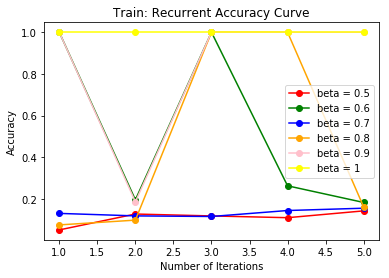

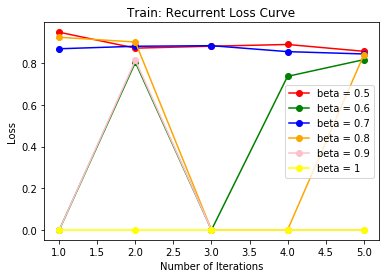

In [58]:
plot_accuracy_curve(recurrent_accuracy_train_array, "Train: Recurrent Accuracy Curve", "train_recur_acc1.png")
plot_error_curve(recurrent_loss_train_array, "Train: Recurrent Loss Curve", "train_recur_loss1.png")

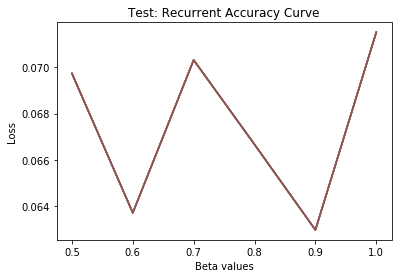

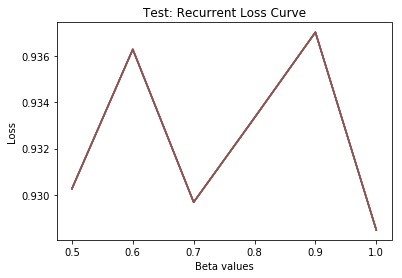

In [59]:
plot_accuracy_curve_test(recurrent_accuracy_test_array, "Test: Recurrent Accuracy Curve", "test_recur_acc1.png")
plot_error_curve_test(recurrent_loss_test_array, "Test: Recurrent Loss Curve", "test_recur_loss1.png")